In [4]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("/Users/bhojraj/Downloads/hr.csv")

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


## we will fill missing values in numeric columns with the mean, median, or mode of that column.Here, we will  fill missing values in the 'age' column with the mean age.

In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)

## For categorical columns, we will fill missing values with the mode (most frequent value) since these are discrete categories.

In [11]:
df['salary'].fillna(df['salary'].mode()[0], inplace=True)

In [12]:
# Check for null values

In [13]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
age                      0
dtype: int64

In [14]:
## Now we will convert the catagorical data into numeric data. 

In [15]:
dummy_df = pd.get_dummies(df['salary'], prefix='salary', drop_first = True)

In [16]:
 #Concatenate the dummy variables with the original DataFrame

In [17]:
df = pd.concat([df, dummy_df], axis=1)

In [18]:
# drop the original categorical column if needed

In [19]:
df = df.drop('salary', axis=1)

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,age,salary_low,salary_medium
0,0.24,0.79,2,175,5,0,0,0,IT,27.018506,1,0
1,0.40,0.49,2,155,3,0,1,0,hr,27.000000,0,1
2,0.45,0.45,2,154,3,1,1,0,support,27.018506,0,1
3,0.46,0.73,6,256,4,0,0,0,product_mng,27.018506,0,0
4,0.14,0.54,5,275,4,1,0,0,sales,27.018506,0,0


In [21]:
df['Department'].unique()

array(['IT', 'hr', 'support', 'product_mng', 'sales', 'technical',
       'marketing', 'management', 'accounting', 'RandD'], dtype=object)

## To convert the categorical values in the 'Department' column into numeric values, we will  use one-hot encoding. This technique creates binary columns for each category, indicating the presence or absence of that category for each row. 

In [22]:
df = pd.get_dummies(df, columns=['Department'], prefix='Department', drop_first = True)

In [23]:
# drop the original 'Department' column 

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,age,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.24,0.79,2,175,5,0,0,0,27.018506,1,0,0,0,0,0,0,0,0,0,0
1,0.40,0.49,2,155,3,0,1,0,27.000000,0,1,0,0,1,0,0,0,0,0,0
2,0.45,0.45,2,154,3,1,1,0,27.018506,0,1,0,0,0,0,0,0,0,1,0
3,0.46,0.73,6,256,4,0,0,0,27.018506,0,0,0,0,0,0,0,1,0,0,0
4,0.14,0.54,5,275,4,1,0,0,27.018506,0,0,0,0,0,0,0,0,1,0,0


In [25]:
df['left'].unique()

array(['0', '1', '?'], dtype=object)

In [26]:
# here is '?' stirng value in the column , we need to replace it with a numeric value , here we will replace it with

In [27]:
df['left'].replace('?', 2, inplace=True)
df['left'] = df['left'].astype(float)

In [28]:
# Now we will deploy the Logistic regression model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error, classification_report

In [30]:
# spliting the data into X and y

In [31]:
X = df.drop('left',axis = 1)
y = df.left

In [32]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.24,0.79,2,175,5,0,0,27.018506,1,0,0,0,0,0,0,0,0,0,0
1,0.40,0.49,2,155,3,0,0,27.000000,0,1,0,0,1,0,0,0,0,0,0
2,0.45,0.45,2,154,3,1,0,27.018506,0,1,0,0,0,0,0,0,0,1,0
3,0.46,0.73,6,256,4,0,0,27.018506,0,0,0,0,0,0,0,1,0,0,0
4,0.14,0.54,5,275,4,1,0,27.018506,0,0,0,0,0,0,0,0,1,0,0


In [33]:
y.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: left, dtype: float64

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 23)

# Using LogisticRegressionm

In [35]:
model = LogisticRegression()

In [36]:
# fit the data into model

In [37]:
model.fit(X_train,y_train)

/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

 # checking for mse , mae and accuracy_score

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [41]:
mse

0.2089303565478174

In [42]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7920693102299233
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      2290
         1.0       0.60      0.38      0.47       710
         2.0       0.00      0.00      0.00         1

    accuracy                           0.79      3001
   macro avg       0.47      0.43      0.45      3001
weighted avg       0.77      0.79      0.77      3001



/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using  Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model = DecisionTreeClassifier()

In [45]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_predict = model.predict(X_test)

In [47]:
y_predict

array([1., 0., 0., ..., 0., 0., 1.])

In [48]:
mse = mean_squared_error(y_test,y_predict)

In [49]:
mse

0.023992002665778073

In [50]:
accuracy = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9790069976674441
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2290
         1.0       0.95      0.97      0.96       710
         2.0       0.00      0.00      0.00         1

    accuracy                           0.98      3001
   macro avg       0.65      0.65      0.65      3001
weighted avg       0.98      0.98      0.98      3001



In [51]:
# comparitivly the DecisionTree Predicted with  more accuracy then LogisticRegression

## To visualize the distribution of the 'left' column (indicating whether employees left the company or not), we can use various plotting libraries in Python. One popular choice is matplotlib or seaborn. Here's a simple example using matplotlib:

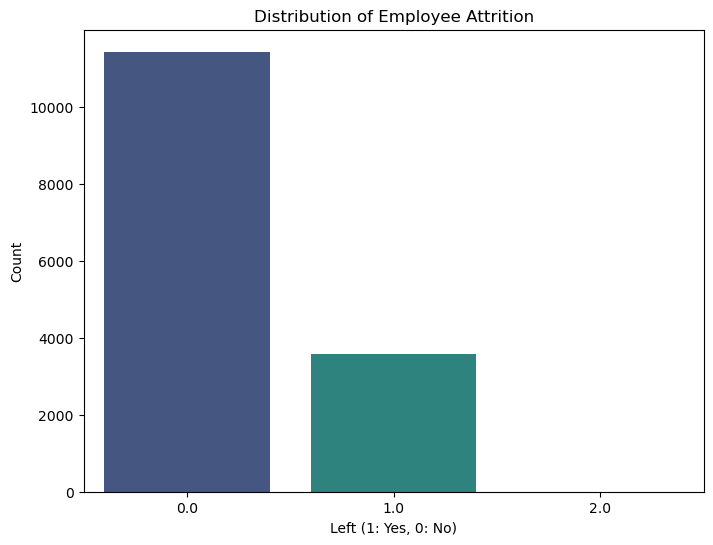

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='left', data=df, palette='viridis')
plt.title('Distribution of Employee Attrition')
plt.xlabel('Left (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()
